### Import Libraries.

In [51]:
import numpy as np 
import pandas as pd 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
X, y = load_breast_cancer(return_X_y=True) 

In [53]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [54]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [55]:
# Standardization of the data. 

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


### Apply KNN.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=6)

In [80]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [81]:
y_pred = knn_model.predict(X_test)

In [82]:
print('Accuracy score : ', accuracy_score(y_pred, y_test))

Accuracy score :  0.9649122807017544


### How we select value of k through random experiment.

In [86]:
scores = [] 

for i in range(1, 16): 
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    accuracy_sc = accuracy_score(y_test, knn_model.predict(X_test))
    scores.append(accuracy_sc)

print(scores)

[0.9473684210526315, 0.9298245614035088, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771]


`NOTE` : Here we clearly see that the for value k = 9, 13, 15 the aaccuracy_score is maximum, so this is the correct way to find out the correct value of the k.

### Plot of accuracy score with k value.

Text(0.5, 1.0, 'Accuracy Score vs k-Value')

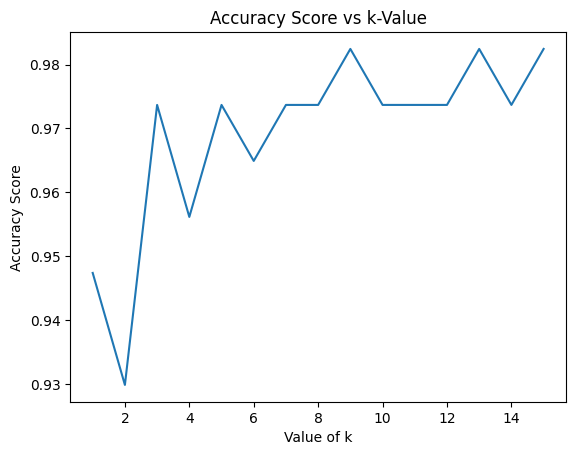

In [88]:
import matplotlib.pyplot as plt 

plt.plot(range(1, 16), scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs k-Value')